f-strings are **TOTALLY AWESOME**!

In [1]:
website = "Braithwaite I/O"

f"Welcome to {website}!"

'Welcome to Braithwaite I/O!'

## I found out about them at PyCon Canada 2017 at Mariatta Wijaya keynote.

In [2]:
from IPython.display import IFrame

IFrame(
    src="https://www.youtube-nocookie.com/embed/kGd1TVfP_Ds",
    width="560",
    height="315",
    frameborder="0",
    allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture",
    allowfullscreen=False,
)

## They also support expressions inside the `{ }`

In [3]:
f"Welcome to {website.upper()}!"

'Welcome to BRAITHWAITE I/O!'

## Even `dict`

In [4]:
portfolio = {"AAPL": 222.77, "RHT": 122.31, "GOOGL": 1111.77}

In [5]:
f'${portfolio['GOOGL']}USD'

SyntaxError: f-string: unmatched '[' (883128829.py, line 1)

### While that's a little embarrassing...

In [6]:
f"${portfolio['GOOGL']}USD"

'$1111.77USD'

## But look what else you can do...

In [7]:
f"${portfolio['GOOGL']:,}USD"

'$1,111.77USD'

# Hey I heard you like dates and times...

In [8]:
import datetime

NOW = datetime.datetime.now()

f"This notebook was run on {NOW:%d %B %Y} at {NOW:%H:%M}!"

'This notebook was run on 18 March 2023 at 15:35!'

# You can use them in `class`...

In [9]:
class Drink:
    def __init__(self, name, caffine):
        self.name = name
        self.caffine = caffine

    def __str__(self):
        return f"{self.name}"

    def caffine_for_quantity(self, size=100000):
        return (
            f"{self.name} has {self.caffine*size:.0f} "
            f"mg for {size/1000:.0f} grams."
        )

In [10]:
coffee = Drink("Coffee", 0.0004)

coffee.caffine_for_quantity()

'Coffee has 40 mg for 100 grams.'

In [11]:
f"{coffee.caffine_for_quantity(459732)}"

'Coffee has 184 mg for 460 grams.'

In [12]:
import timeit

format_funcs = {
    "f-strings": """
def format(superhero, rank):
    return f'{superhero} has a rank of {rank}!'
""",
    "%-formatting": """
def format(superhero, rank):
    return '%s has a rank of %s!' % (superhero, str(rank))
""",
    ".format()": """
def format(superhero, rank):
    return '{} has a rank of {}!'.format(superhero, str(rank))
""",
    "concatenation +": """
def format(superhero, rank):
    return superhero + ' has a rank of ' + str(rank) + '!'
""",
    "concatenation ()": """
def format(superhero, rank):
    return superhero, ' has a rank of ', str(rank), '!'
""",
}

test_func = """def test_format():
    for superhero in ('Wonder Woman', 'Supergirl', 'Batman', 'Robin'):
        for rank in range (1, 101):
            format(superhero, rank)
"""

data = []

for key, func in format_funcs.items():
    data.append(
        {
            "method": key,
            "time": float(
                timeit.timeit("test_format()", func + test_func, number=10000)
            ),
        }
    )

In [13]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame(
    [
        {"method": "f-strings", "time": 1.2825216680000153},
        {"method": "%-formatting", "time": 2.282235770999989},
        {"method": ".format()", "time": 2.983771015000002},
        {"method": "concatenation +", "time": 1.9718771689999812},
        {"method": "concatenation ()", "time": 1.402194948999977},
    ]
)

# and it's fast...

<Axes: ylabel='method'>

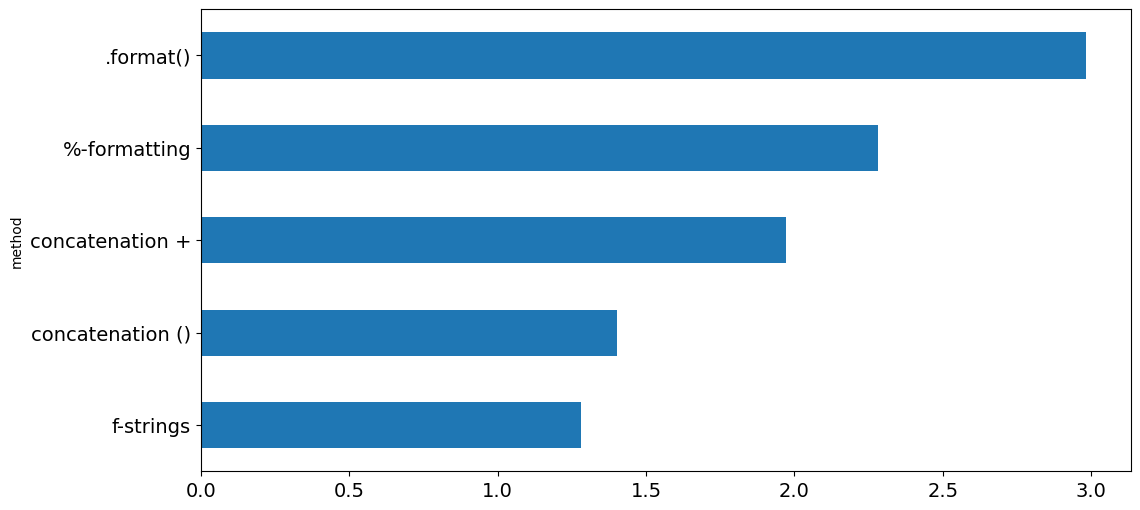

In [14]:
df.sort_values("time").plot(
    kind="barh",
    x="method",
    y="time",
    figsize=(12, 6),
    fontsize=14,
    legend=False,
)